# 1.4

# First Order Derivative with Central Difference Method

### $$f'(x) = \lim_{x \to 0}\frac{f(x+h) - f(x)}{h}\\ f'(x) = \lim_{x \to 0}\frac{f(x) - f(x - h)}{h}\\\text{if we add those two above we get:} \\ 2f'(x) = \lim_{x \to 0}\frac{f(x+h) - f(x - h)}{h}\\ f'(x) = \lim_{x \to 0}\frac{f(x+h) - f(x - h)}{2h}$$

# Second Order Dervative With Central Difference Method

### $$ y(x + h) = y(x) + hy'(x) + \frac{h^2}{2}y''(x) + \frac{h^3}{6}y'''(x) + \frac{h^4}{24}y''''(x)\\ y(x - h) = y(x) - hy'(x) + \frac{h^2}{2}y''(x) - \frac{h^3}{6}y'''(x) + \frac{h^4}{24}y''''(x)\\ y(x + h) + y(x - h) = 2y(x) + h^2y''(x) + \frac{h^4}{12}y''''(x)\\ y''(x) = \frac{y(x + h) + y(x - h) - 2y(x)}{h^2} + O $$

In [34]:
import numpy as np

F = lambda x: np.exp(x)
cos = lambda x: np.cos(x)
giga = lambda x: np.sin(np.exp(x))/np.exp(x)

def central(func ,x ,h):
    f = (func(x + h) - func(x-h))/(h*2)
    return f
a =  np.array([0.1,1,10,100])

def central2(func, x ,h):
    f2 = (func(x + h) + func(x-h) -2*func(x))/(h**2)
    return f2

In [16]:
central(F, x = a, h = 0.001)

data = []

for iter in range(4):
    i = 0.1
    i *= 10
    relative_error = np.exp(i) - central(F, i, 0.0001)
    data.append(relative_error)

In [20]:
print(central(cos, a,0.001))
print(central2(cos, a, 0.001))

[-0.0998334  -0.84147084  0.54402102  0.50636556]
[-0.99500408 -0.54030226  0.83907146 -0.8623188 ]


In [21]:
np.transpose([np.exp(np.arange(0,12,1)),central(F, np.arange(0,12,1),0.0001)])

array([[1.00000000e+00, 1.00000000e+00],
       [2.71828183e+00, 2.71828183e+00],
       [7.38905610e+00, 7.38905611e+00],
       [2.00855369e+01, 2.00855370e+01],
       [5.45981500e+01, 5.45981501e+01],
       [1.48413159e+02, 1.48413159e+02],
       [4.03428793e+02, 4.03428794e+02],
       [1.09663316e+03, 1.09663316e+03],
       [2.98095799e+03, 2.98095799e+03],
       [8.10308393e+03, 8.10308394e+03],
       [2.20264658e+04, 2.20264658e+04],
       [5.98741417e+04, 5.98741418e+04]])

In [22]:
np.transpose([central2(cos, a, np.pi/10), central2(cos, a, np.pi/1000000)])

array([[-0.98684746, -0.99501118],
       [-0.53587309, -0.5403077 ],
       [ 0.83219311,  0.83907878],
       [-0.85524988, -0.86231903]])

In [23]:
np.transpose([-np.cos(a), central2(cos, a, np.pi/1000000)])

array([[-0.99500417, -0.99501118],
       [-0.54030231, -0.5403077 ],
       [ 0.83907153,  0.83907878],
       [-0.86231887, -0.86231903]])

# 1.5 

# $$ \textbf{Riemann Sums}$$

### Riemann sum calculates the area below the integral by putting rectangles all around the above as you can guess does rectangles sometimes overestimates sometimes underestimates.
### The interval [a, b] is therefore divided into {\displaystyle n}n subintervals, each of length:
### Starting point of thoose rectangles are a, a + $\Delta x$, a + 2 $\Delta x $, ... + a + (n - 1)$\Delta x$ , b

## $$ \Delta x = \frac{b - a}{n} $$
### At one point ractangles will touch the graph and that will slightly change the result they can touch the graph from left or right thoose are called as Right Riemann Sum and Left Riemann Sum.

## $$ A_{Left} = \Delta x[f(a) + f(a +  \Delta x) + f(a +  2\Delta x) + ... + f(b - \Delta x)] $$
## $$ A_{Right} = \Delta x[f(a +  \Delta x) + f(a +  2\Delta x) + ... + f(b)] $$

### We could also try to calculate stuff with setting the rectangles touch the graph on the middle of their top that would create something like this:

## $$A_{Mid} = \Delta x[f(a +  \frac{\Delta x}{2}) + f(a +  \frac{3\Delta x}{2}) + ... + f(b - \frac{\Delta x}{2})] $$

In [24]:
from turtle import width


def U(x):
    return np.exp(x)


def riemann(func,lower_bound, upper_bound, step_size):
    integral = 0
    area = func*step_size
    integral = integral + area
    print(np.sum(integral))

riemann(U(np.arange(0,10,0.000001)),0,10,0.000001)

def mid_riemann(func, lower_bound, upper_bound, step_size):
    x = lower_bound + 0.5*step_size
    integral = 0
    while (x < upper_bound):
        area = func(x)*step_size
        integral += area
        x = x +step_size
    print(integral)

mid_riemann(F, 0, 10, 0.000001)






22025.454782075634
22025.46579251068


# $$ \textbf{Trapezoidal Rule For Integration} $$

### The trapezoidal rule works by approximating the region under the graph of the function f(x) as a trapezoid and calculating its area. And of course we know area of a trapezoid is $\frac{Height_{1} + Height_{2}}{2} \Delta x $

## $$ \int_{a}^{b} f(x) \,dx \approx   \sum_{k=1}^{N} \frac{f(x_{k - 1}) + f(x_{k})}{2} \Delta x  $$
## $$ \Delta x = \frac{b - a}{N} $$
## $$ \int_{a}^{b} f(x) \,dx \approx \frac{\Delta x}{2}(f(x_{0}) + 2f(x_{1}) + 2f(x_{2}) + 2f(x_{3}) + ... + 2f(x_{N - 1}) + 2f(x_{N})) $$ 

In [39]:
def trapezoid(func, lower_bound, upper_bound, N):
    dx = (upper_bound - lower_bound)/N
    area = 0
    area += dx*func(lower_bound)/2
    area += dx*func(upper_bound)/2
    for j in range(0, N):
        area += dx*func(lower_bound + j*dx)
    return area

In [40]:
trapezoid(cos, 0, 10, 1000000)

-0.5440111108848313

# $$\textbf{Integrations With Monte Carlo Method}$$

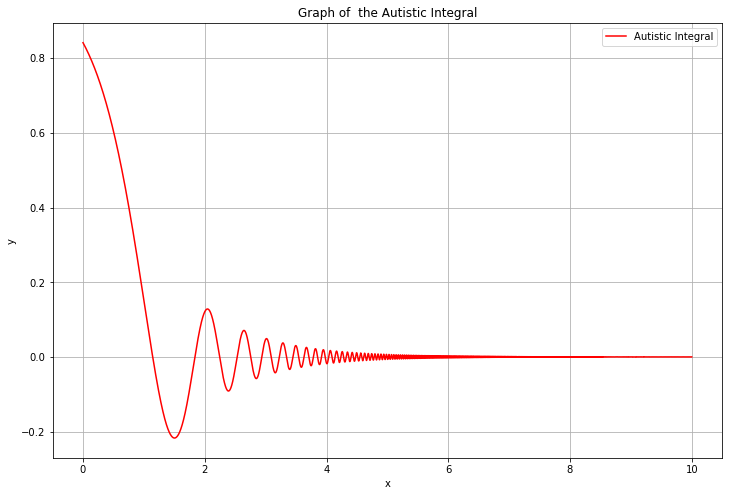

In [54]:
#Defining A complicated function that I want to integrate

import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

def R(x):
    return np.sin(np.exp(x))/np.exp(x)


x = np.arange(0,10,0.001)

y = R(x)

plt.figure(figsize = (12, 8))
plt.plot(x, y, color = 'red' ,label='Autistic Integral')
plt.title('Graph of  the Autistic Integral')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend(loc='upper right')
plt.show() 


In [75]:
#defining the solving algorithm

def monte_int(x,y): 
    count = 0
    int_area = 0
    while count < 10**6:
        x_monte = np.random.uniform(0,10)
        int_area += R(x_monte)
    
        count += 1
    return int_area/count*10


In [76]:
# Accuracy Checking

np.transpose([monte_int(x, R(x)), trapezoid(giga,0,10,100000)])

array([0.50208759, 0.50415121])